In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('./1/235217340862dat.txt',skiprows = 1, delimiter=',',index_col=1)
df.head()

D:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,17,19,23,29,53,55,57,59,61,123,126,133,155,159,194,515,517,521,523,760,764,766,768,770,772,774,776,777,781,782,788,792,796,798,800,802,833,837,839,842,845,924,931,937) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,USAF,NCDC,Date,HrMn,I,Type,QCP,Dir,Q,I.1,...,Ne,Q.397,ICE,Disc,PIP,SIP,Stg-Hgt,Ice-Slush,Wtr-Lvl,Remarks
94728,725053,20140101,51,7,FM-15,,290,5,N,4.6,...,9,999,99999,99,99,9999,9,9,MET10412/31/13 19:51:03 METAR KNYC 010051Z 290...,...
94728,725053,20140101,151,7,FM-15,,290,5,V,3.6,...,9,999,99999,99,99,9999,9,9,MET10112/31/13 20:51:03 METAR KNYC 010151Z 290...,...
94728,725053,20140101,251,7,FM-15,,300,5,N,3.6,...,9,999,99999,99,99,9999,9,9,MET11012/31/13 21:51:03 METAR KNYC 010251Z 300...,...
94728,725053,20140101,351,7,FM-15,,999,9,V,3.1,...,9,999,99999,99,99,9999,9,9,MET10412/31/13 22:51:03 METAR KNYC 010351Z VRB...,...
94728,725053,20140101,451,7,FM-15,,290,5,N,4.6,...,9,999,99999,99,99,9999,9,9,MET11412/31/13 23:51:03 METAR KNYC 010451Z 290...,...


In [3]:
df.columns = np.append(df.columns.values[1:],'old')

In [4]:
df.drop(['old'],axis = 1, inplace=True)

In [5]:
df = df.assign(HrMn = df['HrMn'].apply(lambda x: '{0:0>4}'.format(x)))

In [6]:
df.DateTime = df['Date'].astype(str) + ' ' + df['HrMn']
df = df.assign(DateTime = pd.to_datetime(df.DateTime, format='%Y%m%d %H%M'))

In [7]:
df.index.name= 'USAF'
df.reset_index(inplace=True)

In [8]:
df.set_index('DateTime',inplace=True)

In [9]:
df.drop(['Date','HrMn'],axis=1,inplace=True)

In [10]:
colList = df.columns.tolist()
colList[2] = 'Station_type'

In [11]:
# process wind date
colList[5] = 'wind_dir_angle'
colList[6] = 'wind_dir_quality'
colList[7] = 'wind_observ_type_code'
colList[8] = 'wind_speed_rate'
colList[9] = 'wind_speed_quality'

In [12]:
# Sky condition
colList[10] = 'sc_heigth'  # HGT: SKY-CONDITION-OBSERVATION ceiling height dimension
colList[11] = 'sc_quality_code' # Q: SKY-CONDITION-OBSERVATION ceiling quality code
colList[12] = 'sc_det_code' # I: SKY-CONDITION-OBSERVATION ceiling determination code
colList[13] = 'sc_cavok' #I: SKY-CONDITION-OBSERVATION CAVOK code

In [13]:
# visibility
colList[14] = 'vis_dist' #VISBY: VISIBILITY-OBSERVATION distance dimension
colList[15] = 'vis_dist_quality_code' # Q: VISIBILITY-OBSERVATION distance quality code
colList[16] = 'vis_var' #I: VISIBILITY-OBSERVATION variability code
colList[17] = 'vis_var_quality_code' #Q: VISIBILITY-OBSERVATION quality variability code

In [14]:
#temperature
colList[18] = 'temp_val' #TEMP: AIR-TEMPERATURE-OBSERVATION air temperature
colList[19] = 'temp_val_quality_code' #Q: AIR-TEMPERATURE-OBSERVATION air temperature quality code

In [15]:
df.columns = colList

In [16]:
df.temp_val[df.temp_val==999.9] = np.nan

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


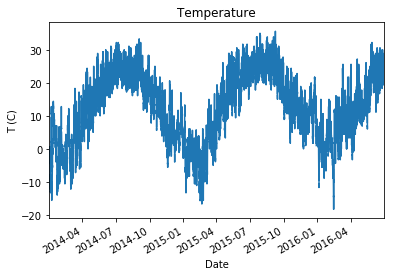

In [17]:
df.temp_val.plot()
plt.xlabel('Date')
plt.ylabel('T (C)')
plt.title('Temperature')

In [18]:
df.wind_speed_rate[df.wind_speed_rate == 999.9] = np.nan

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


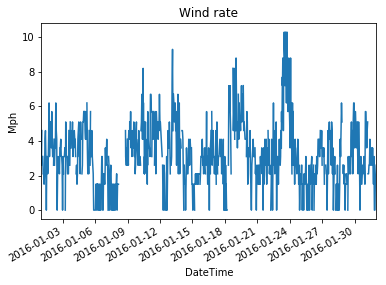

In [19]:
df.wind_speed_rate['01-2016'].plot()
plt.ylabel('Mph')
plt.title('Wind rate')

In [20]:
# Dewpoint (точка росы)
colList[20] = 'dewpt_temp' # DEWPT: AIR-TEMPERATURE-OBSERVATION-DEWPOINT temperature
colList[21] = 'dewpt_temp_qual_code' # Q: AIR-TEMPERATURE-OBSERVATION-DEWPOINT quality code

In [21]:
# atmospheric pressure
colList[22] = 'slp_val' # SLP: ATMOSPHERIC-PRESSURE-OBSERVATION sea level pressure
colList[23] = 'slp_val_quality_code' # Q: ATMOSPHERIC-PRESSURE-OBSERVATION sea level pressure quality code

In [22]:
df.columns = colList

In [23]:
# LIQUID-PRECIPITATION (Hourly) header (данные по осадкам за час)
colList[24] = 'prh_period' # PR: LIQUID-PRECIPITATION (Hourly) period quantity in hours
colList[25] = 'prh_val'    # AMT: LIQUID-PRECIPITATION (Hourly) depth dimension
colList[26] = 'prh_condition' # I: LIQUID-PRECIPITATION (Hourly) condition code
colList[27] = 'prh_quality_code' # Q: LIQUID-PRECIPITATION (Hourly) quality code

In [24]:
# LIQUID-PRECIPITATION (Hourly) header 2 (данные по осадкам за час)
colList[28] = 'prh2_period' # PR: LIQUID-PRECIPITATION (Hourly) period quantity in hours
colList[29] = 'prh2_val'    # AMT: LIQUID-PRECIPITATION (Hourly) depth dimension
colList[30] = 'prh2_condition' # I: LIQUID-PRECIPITATION (Hourly) condition code
colList[31] = 'prh2_quality_code' # Q: LIQUID-PRECIPITATION (Hourly) quality code

In [25]:
# LIQUID-PRECIPITATION (Hourly) header 3 (данные по осадкам за час)
colList[32] = 'prh3_period' # PR: LIQUID-PRECIPITATION (Hourly) period quantity in hours
colList[33] = 'prh3_val'    # AMT: LIQUID-PRECIPITATION (Hourly) depth dimension
colList[34] = 'prh3_condition' # I: LIQUID-PRECIPITATION (Hourly) condition code
colList[35] = 'prh3_quality_code' # Q: LIQUID-PRECIPITATION (Hourly) quality code

In [26]:
# LIQUID-PRECIPITATION (Hourly) header 4 (данные по осадкам за час)
colList[36] = 'prh4_period' # PR: LIQUID-PRECIPITATION (Hourly) period quantity in hours
colList[37] = 'prh4_val'    # AMT: LIQUID-PRECIPITATION (Hourly) depth dimension
colList[38] = 'prh4_condition' # I: LIQUID-PRECIPITATION (Hourly) condition code
colList[39] = 'prh4_quality_code' # Q: LIQUID-PRECIPITATION (Hourly) quality code

In [27]:
df.columns = colList

Посмотрим на данные по первому сету осадков

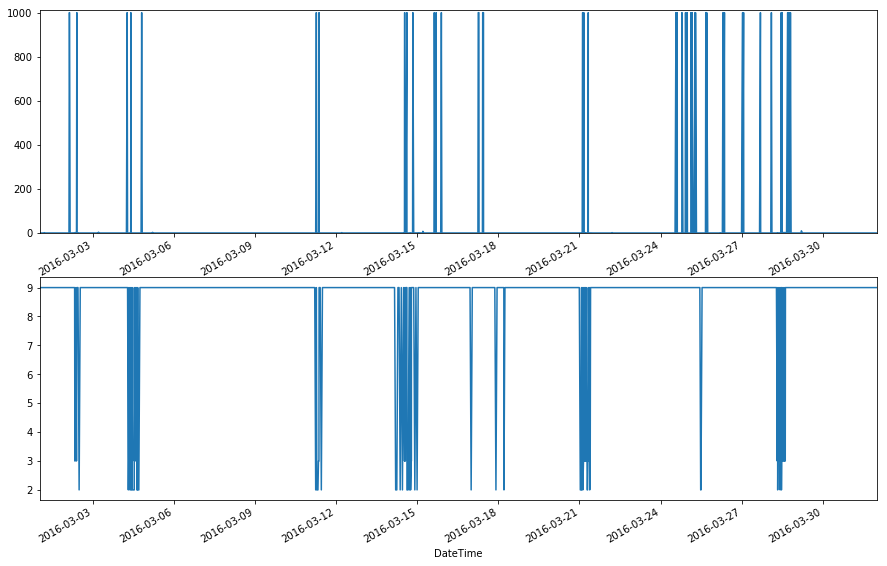

In [28]:
plt.figure(figsize=[15,10])

plt.subplot(211)
df.prh_val['03-2016'].plot()
plt.ylim([0,1010])

plt.subplot(212)
df.prh_condition['03-2016'].plot()

In [29]:
df.prh_val[df.prh_val == 999.9] =0
df.prh2_val[df.prh2_val == 999.9] =0
df.prh3_val[df.prh3_val == 999.9] =0
df.prh4_val[df.prh4_val == 999.9] =0

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is 

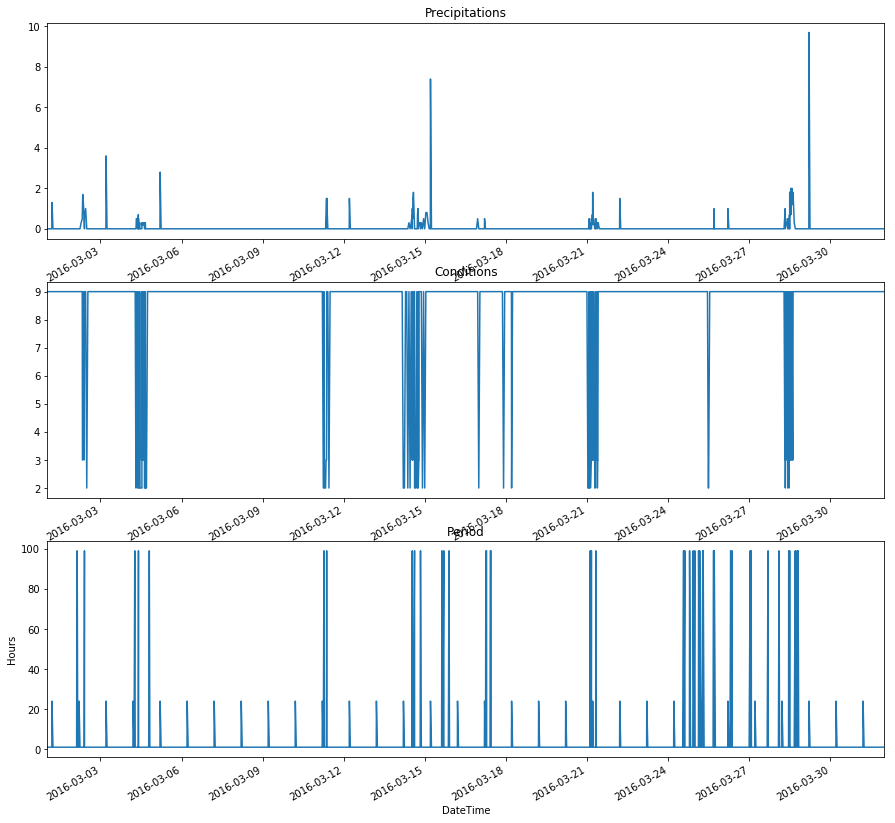

In [30]:
plt.figure(figsize=[15,15])

plt.subplot(311)
df.prh_val['03-2016'].plot()
plt.title('Precipitations')

plt.subplot(312)
df.prh_condition['03-2016'].plot()
plt.title('Conditions')

plt.subplot(313)
df.prh_period['03-2016'].plot()
plt.title('Period')
plt.ylabel('Hours')

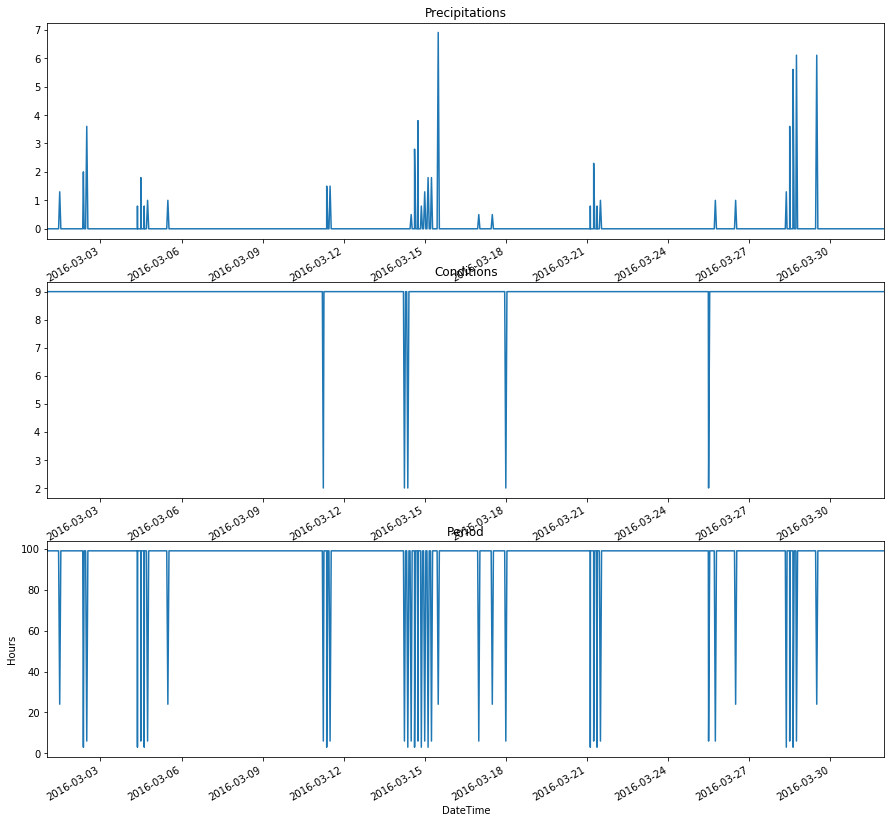

In [31]:
plt.figure(figsize=[15,15])

plt.subplot(311)
df.prh2_val['03-2016'].plot()
plt.title('Precipitations')

plt.subplot(312)
df.prh2_condition['03-2016'].plot()
plt.title('Conditions')

plt.subplot(313)
df.prh2_period['03-2016'].plot()
plt.title('Period')
plt.ylabel('Hours')

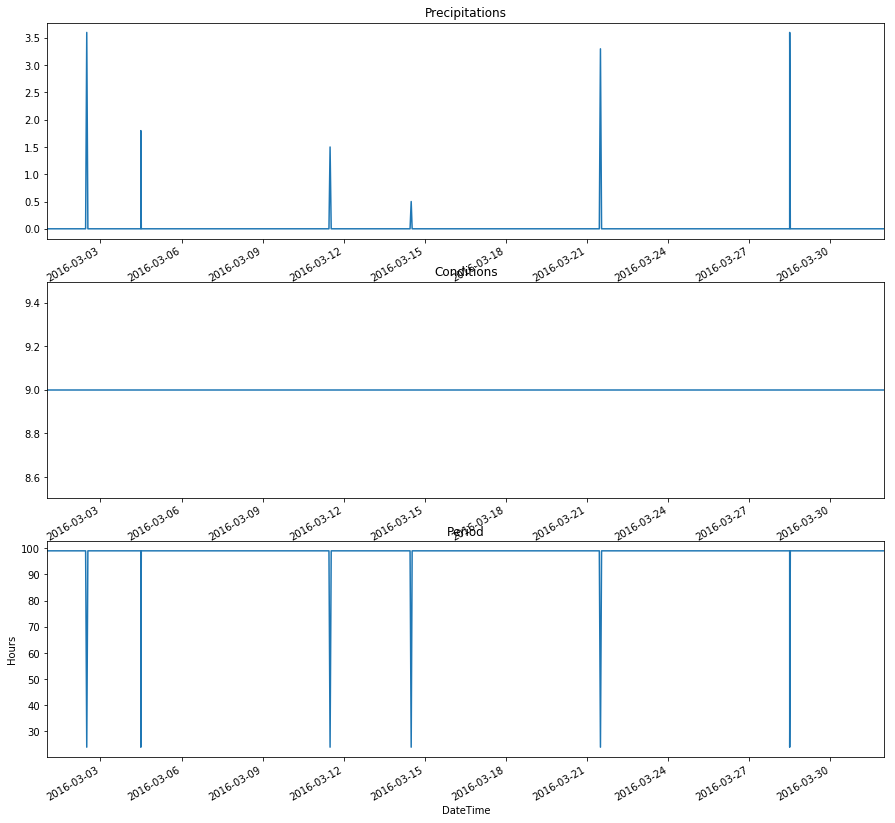

In [32]:
plt.figure(figsize=[15,15])

plt.subplot(311)
df.prh3_val['03-2016'].plot()
plt.title('Precipitations')

plt.subplot(312)
df.prh3_condition['03-2016'].plot()
plt.title('Conditions')

plt.subplot(313)
df.prh3_period['03-2016'].plot()
plt.title('Period')
plt.ylabel('Hours')

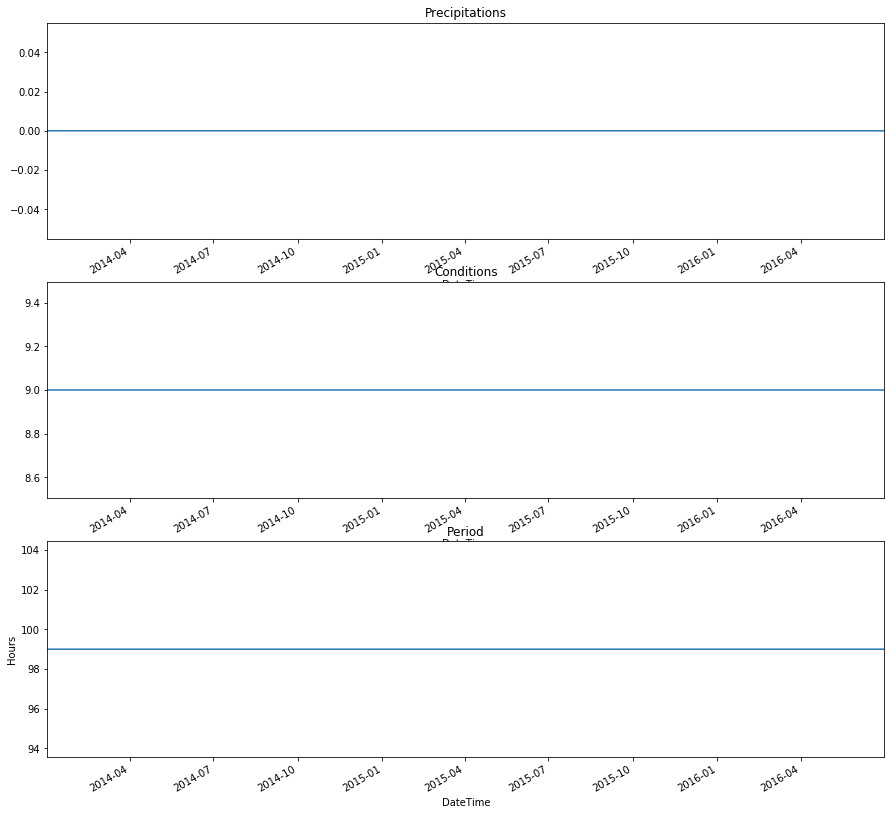

In [33]:
plt.figure(figsize=[15,15])

plt.subplot(311)
df.prh4_val.plot()
plt.title('Precipitations')

plt.subplot(312)
df.prh4_condition.plot()
plt.title('Conditions')

plt.subplot(313)
df.prh4_period.plot()
plt.title('Period')
plt.ylabel('Hours')

Сводный график осадков

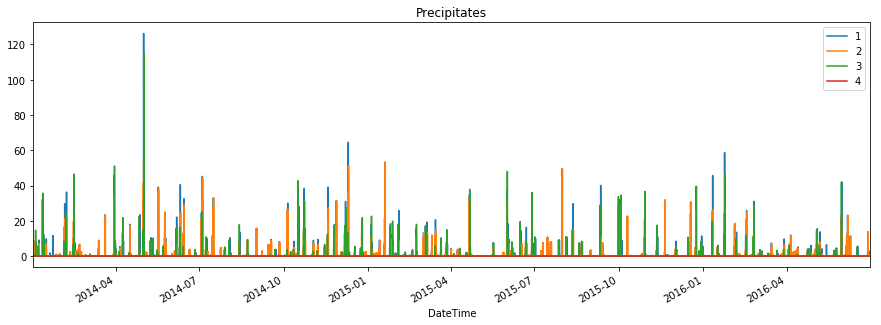

In [34]:
plt.figure(figsize=[15,5])

df.prh_val.plot()
df.prh2_val.plot()
df.prh3_val.plot()
df.prh4_val.plot()
plt.legend(['1','2','3','4'])
plt.title('Precipitates')

In [35]:
#PCPHST: PRECIPITATION-OBSERVATION-HISTORY header
colList[43] = 'pcphst_duration' # PRECIPITATION-OBSERVATION-HISTORY duration code
colList[44] = 'pcphst_code'     # PRECIPITATION-OBSERVATION-HISTORY characteristic code
colList[45] = 'pcphst_quality_code' # PRECIPITATION-OBSERVATION-HISTORY PRECIPITATION duration/characteristic quality code

In [36]:
df.columns = colList

In [37]:
df.pcphst_code[df.pcphst_code != 9]

Series([], Name: pcphst_code, dtype: int64)

In [38]:
df.pcphst_duration[df.pcphst_duration != 9]

Series([], Name: pcphst_duration, dtype: int64)

К сожалению, это абсолютно пустной набор. В нём ничего нет (

In [39]:
c = df.loc[:,'Dpth'].copy()

In [40]:
c[c == 9999] = 0

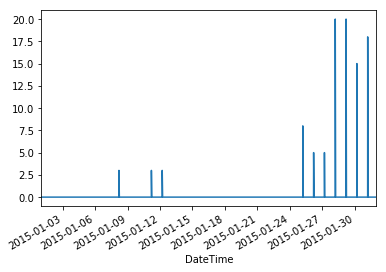

In [41]:
c['01-01-2015':'01-31-2015'].plot()

(735599.0, 735630.0)

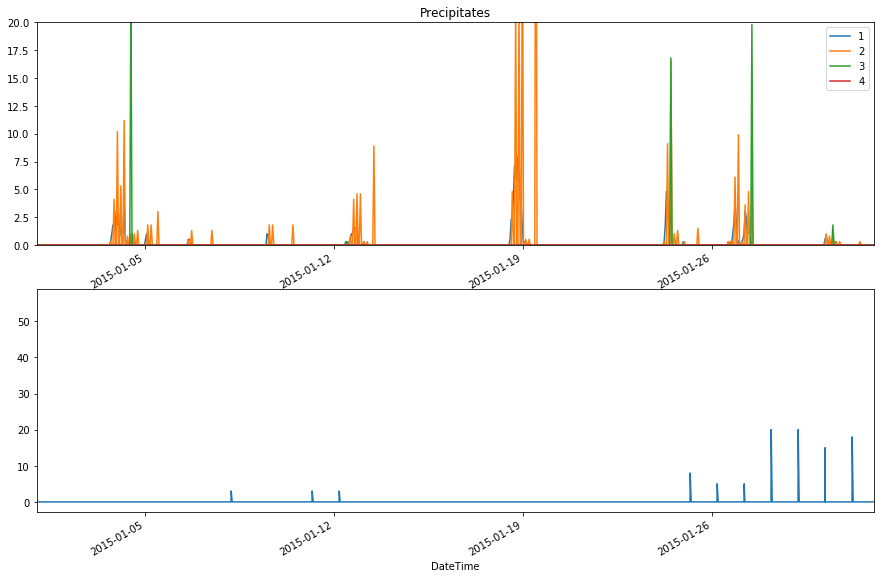

In [125]:
plt.figure(figsize=[15,10])

plt.subplot(211)

df.prh_val.plot()
df.prh2_val.plot()
df.prh3_val.plot()
df.prh4_val.plot()
plt.xlim('01-2015','02-2015')
plt.legend(['1','2','3','4'])
plt.title('Precipitates')
plt.ylim([0, 20])


plt.subplot(212)
c.plot()
plt.xlim('01-2015','02-2015')

In [43]:
# надо сделать интерполяцию по данным снега

In [44]:
#tripCount = tripCount.reindex(new_index,fill_value = 0,copy = False)
snowSeries.reindex(df.index,copy=False)

NameError: name 'snowSeries' is not defined

In [45]:
df.Type.unique()

array(['FM-15', '  SOM', 'FM-16', '  SOD'], dtype=object)

В данных есть результаты от четырёх типов станций:
<ul>
<li> FM-15: METAR Aviation routine weather report
<li> FM-16: SPECI Aviation selected special weather report
<li> SOD: Summary of day report from U.S. ASOS or AWOS station
<li> SOM: Summary of month report from U.S. ASOS or AWOS station
</ul>

Данные от SOD необходимо вынести в отдельных набор и использовать для получения инфы о снежном покрове и т.д.

Данные от SOM не представляют интереса сейчас (можно удалить).

Посмотреть на FM-16 и FM-15

In [46]:
SOD = df.query("Type == '  SOD'")
df = df[df.Type!= "  SOD"]
SOD.head()

,USAF,NCDC,Station_type,Type,QCP,wind_dir_angle,wind_dir_quality,wind_observ_type_code,wind_speed_rate,wind_speed_quality,...,Ne,Q.397,ICE,Disc,PIP,SIP,Stg-Hgt,Ice-Slush,Wtr-Lvl,Remarks
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 04:59:00,94728,725053,6,SOD,,999,9,9,NaN,9,...,99,9,999,99999,99,99,9999,9,9,SOD73924 HR PRECIPITATION (IN): 0.00 SNOW DEPT...
2014-01-03 04:59:00,94728,725053,6,SOD,,999,9,9,NaN,9,...,99,9,999,99999,99,99,9999,9,9,SOD78424 HR PRECIPITATION (IN): 0.33 SNOW DEPT...
2014-01-04 04:59:00,94728,725053,6,SOD,,999,9,9,NaN,9,...,99,9,999,99999,99,99,9999,9,9,SOD75624 HR PRECIPITATION (IN): 0.29 SNOW DEPT...
2014-01-05 04:59:00,94728,725053,6,SOD,,999,9,9,NaN,9,...,99,9,999,99999,99,99,9999,9,9,SOD73924 HR PRECIPITATION (IN): 0.00 SNOW DEPT...
2014-01-06 04:59:00,94728,725053,6,SOD,,999,9,9,NaN,9,...,99,9,999,99999,99,99,9999,9,9,SOD75824 HR PRECIPITATION (IN): 0.14 SNOW DEPT...


In [47]:
FM16 = df[df.Type == "FM-16"]
df = df[df.Type!= "FM-16"]
FM16.head(3)

,USAF,NCDC,Station_type,Type,QCP,wind_dir_angle,wind_dir_quality,wind_observ_type_code,wind_speed_rate,wind_speed_quality,...,Ne,Q.397,ICE,Disc,PIP,SIP,Stg-Hgt,Ice-Slush,Wtr-Lvl,Remarks
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 02:58:00,94728,725053,7,FM-16,,60,5,N,3.6,5,...,99,9,999,99999,99,99,9999,9,9,MET08701/01/14 21:58:02 SPECI KNYC 020258Z 060...
2014-01-02 09:15:00,94728,725053,7,FM-16,,70,5,N,5.1,5,...,99,9,999,99999,99,99,9999,9,9,MET12501/02/14 04:15:02 SPECI KNYC 020915Z 070...
2014-01-02 10:20:00,94728,725053,7,FM-16,,60,5,N,5.7,5,...,99,9,999,99999,99,99,9999,9,9,MET11401/02/14 05:20:02 SPECI KNYC 021020Z 060...


In [49]:
SOM = df.query("Type == '  SOM'")
df = df[df.Type!= "  SOM"]
SOM.head()

,USAF,NCDC,Station_type,Type,QCP,wind_dir_angle,wind_dir_quality,wind_observ_type_code,wind_speed_rate,wind_speed_quality,...,Ne,Q.397,ICE,Disc,PIP,SIP,Stg-Hgt,Ice-Slush,Wtr-Lvl,Remarks
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-01 04:59:00,94728,725053,6,SOM,,999,9,9,NaN,9,...,99,9,999,99999,99,99,9999,9,9,SOM796PCP MTOT:4.85 PCP GT 24HRS:1.45 DATE(S):...
2014-02-01 04:59:00,94728,725053,6,SOM,,999,9,9,NaN,9,...,99,9,999,99999,99,99,9999,9,9,SOM792PCP MTOT:0.08 PCP GT 24HRS:0.04 DATE(S):...
2014-03-01 04:59:00,94728,725053,6,SOM,,999,9,9,NaN,9,...,99,9,999,99999,99,99,9999,9,9,SOM793PCP MTOT:2.88 PCP GT 24HRS:1.96 DATE(S):...
2014-04-01 04:59:00,94728,725053,6,SOM,,999,9,9,NaN,9,...,99,9,999,99999,99,99,9999,9,9,SOM793PCP MTOT:3.67 PCP GT 24HRS:2.01 DATE(S):...
2014-05-01 04:59:00,94728,725053,6,SOM,,999,9,9,NaN,9,...,99,9,999,99999,99,99,9999,9,9,SOM790PCP MTOT:7.85 PCP GT 24HRS:4.97 DATE(S):...


In [50]:
df

,USAF,NCDC,Station_type,Type,QCP,wind_dir_angle,wind_dir_quality,wind_observ_type_code,wind_speed_rate,wind_speed_quality,...,Ne,Q.397,ICE,Disc,PIP,SIP,Stg-Hgt,Ice-Slush,Wtr-Lvl,Remarks
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:51:00,94728,725053,7,FM-15,,290,5,N,4.6,5,...,99,9,999,99999,99,99,9999,9,9,MET10412/31/13 19:51:03 METAR KNYC 010051Z 290...
2014-01-01 01:51:00,94728,725053,7,FM-15,,290,5,V,3.6,5,...,99,9,999,99999,99,99,9999,9,9,MET10112/31/13 20:51:03 METAR KNYC 010151Z 290...
2014-01-01 02:51:00,94728,725053,7,FM-15,,300,5,N,3.6,5,...,99,9,999,99999,99,99,9999,9,9,MET11012/31/13 21:51:03 METAR KNYC 010251Z 300...
2014-01-01 03:51:00,94728,725053,7,FM-15,,999,9,V,3.1,5,...,99,9,999,99999,99,99,9999,9,9,MET10412/31/13 22:51:03 METAR KNYC 010351Z VRB...
2014-01-01 04:51:00,94728,725053,7,FM-15,,290,5,N,4.6,5,...,99,9,999,99999,99,99,9999,9,9,MET11412/31/13 23:51:03 METAR KNYC 010451Z 290...
2014-01-01 05:51:00,94728,725053,7,FM-15,,260,5,N,1.5,5,...,99,9,999,99999,99,99,9999,9,9,MET11901/01/14 00:51:02 METAR KNYC 010551Z 260...
2014-01-01 06:51:00,94728,725053,7,FM-15,,280,5,N,4.1,5,...,99,9,999,99999,99,99,9999,9,9,MET10401/01/14 01:51:02 METAR KNYC 010651Z 280...
2014-01-01 07:51:00,94728,725053,7,FM-15,,300,5,N,4.1,5,...,99,9,999,99999,99,99,9999,9,9,MET09901/01/14 02:51:02 METAR KNYC 010751Z 300...
2014-01-01 08:51:00,94728,725053,7,FM-15,,280,5,N,4.1,5,...,99,9,999,99999,99,99,9999,9,9,MET10201/01/14 03:51:02 METAR KNYC 010851Z 280...


Теперь в df остались только часовые отчёты о погоде. 

### Восстановление данных по снежному покрову.

In [60]:
SOD.drop(['USAF','NCDC','Station_type','Type','QCP','wind_dir_angle','wind_dir_quality','wind_observ_type_code',
         'wind_speed_rate'],axis = 1)

,wind_speed_quality,sc_heigth,sc_quality_code,sc_det_code,sc_cavok,vis_dist,vis_dist_quality_code,vis_var,vis_var_quality_code,temp_val,...,Ne,Q.397,ICE,Disc,PIP,SIP,Stg-Hgt,Ice-Slush,Wtr-Lvl,Remarks
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 04:59:00,9,99999,9,9,9,,9,9,9,NaN,...,99,9,999,99999,99,99,9999,9,9,SOD73924 HR PRECIPITATION (IN): 0.00 SNOW DEPT...
2014-01-03 04:59:00,9,99999,9,9,9,,9,9,9,NaN,...,99,9,999,99999,99,99,9999,9,9,SOD78424 HR PRECIPITATION (IN): 0.33 SNOW DEPT...
2014-01-04 04:59:00,9,99999,9,9,9,,9,9,9,NaN,...,99,9,999,99999,99,99,9999,9,9,SOD75624 HR PRECIPITATION (IN): 0.29 SNOW DEPT...
2014-01-05 04:59:00,9,99999,9,9,9,,9,9,9,NaN,...,99,9,999,99999,99,99,9999,9,9,SOD73924 HR PRECIPITATION (IN): 0.00 SNOW DEPT...
2014-01-06 04:59:00,9,99999,9,9,9,,9,9,9,NaN,...,99,9,999,99999,99,99,9999,9,9,SOD75824 HR PRECIPITATION (IN): 0.14 SNOW DEPT...
2014-01-07 04:59:00,9,99999,9,9,9,,9,9,9,NaN,...,99,9,999,99999,99,99,9999,9,9,SOD75724 HR PRECIPITATION (IN): 0.36 SNOW DEPT...
2014-01-08 04:59:00,9,99999,9,9,9,,9,9,9,NaN,...,99,9,999,99999,99,99,9999,9,9,SOD73924 HR PRECIPITATION (IN): 0.00 SNOW DEPT...
2014-01-09 04:59:00,9,99999,9,9,9,,9,9,9,NaN,...,99,9,999,99999,99,99,9999,9,9,SOD73924 HR PRECIPITATION (IN): 0.00 SNOW DEPT...
2014-01-10 04:59:00,9,99999,9,9,9,,9,9,9,NaN,...,99,9,999,99999,99,99,9999,9,9,SOD73924 HR PRECIPITATION (IN): 0.00 SNOW DEPT...


(735964.0, 736055.0)

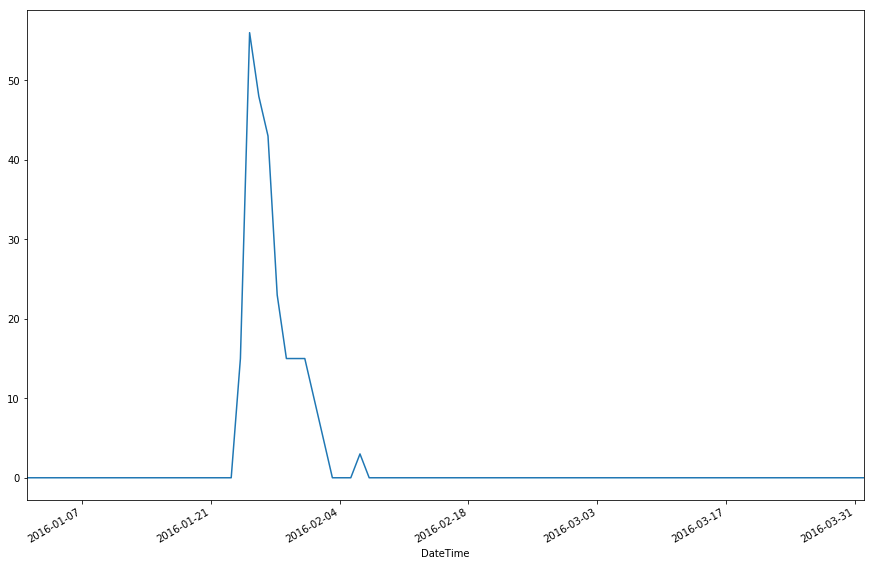

In [61]:
snowSeries = SOD.Dpth.copy()
plt.figure(figsize=[15,10])
snowSeries.plot()
plt.xlim(['01-2016','04-2016'])

In [71]:
snowSeries.index = snowSeries.index.round('1H')

In [76]:
snowSeries.head()

DateTime
2014-01-02 05:00:00     0
2014-01-03 05:00:00     0
2014-01-04 05:00:00    15
2014-01-05 05:00:00    15
2014-01-06 05:00:00    10
Name: Dpth, dtype: int64

In [84]:
snowSeries = snowSeries.reindex(df.index.floor('1H'))
snowSeries['2014-01-01 05:00:00'] = 0

In [121]:
snowSeries = snowSeries.interpolate().fillna(0)

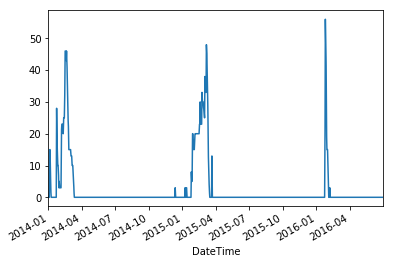

In [123]:
snowSeries.plot()

Данные по снегу готовы и лежат в snowSeries

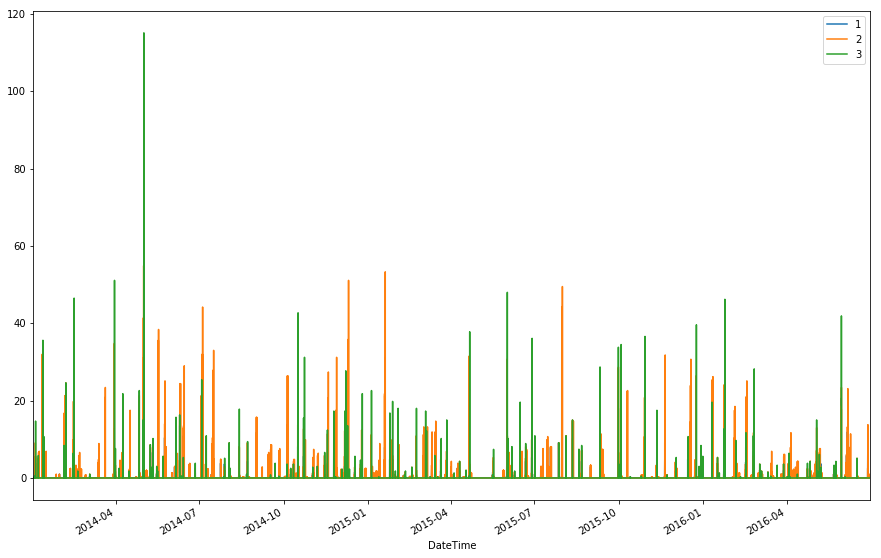

In [165]:
plt.figure(figsize=[15,10])
df.prh_val.plot()
df.prh2_val.plot()
df.prh3_val.plot()
#plt.xlim(['07-2014','08-2014'])
plt.legend([1,2,3])
#plt.ylim([0, 40])

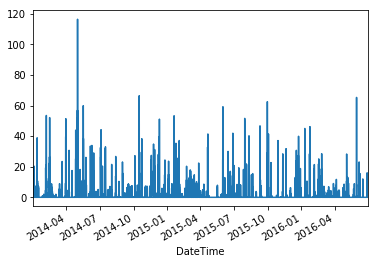

In [162]:
prh = df.prh_val+df.prh2_val+df.prh3_val
prh.plot()

In [169]:
prh.index = prh.index.floor('1H')

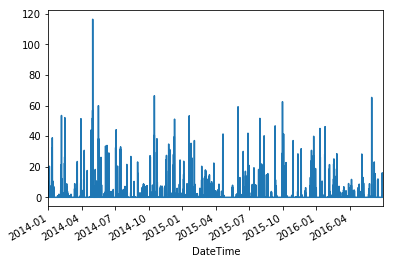

In [170]:
prh.plot()

In [173]:
prh = prh.to_frame(name='precip')
weatherDf = snowSeries.to_frame(name='snow')
weatherDf = weatherDf.merge(prh,left_index=True,right_index=True)

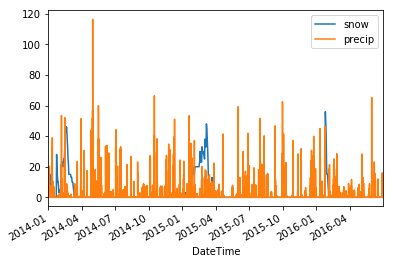

In [184]:
weatherDf.plot()

In [185]:
weatherDf.to_pickle('weatherDf.pcl')